#1. Upload File

In [1]:
# Trained Data File: eye.xml, frontface.xml
# obama1.mp4
from google.colab import files
files.upload()

Saving haarcascade_eye_tree_eyeglasses.xml to haarcascade_eye_tree_eyeglasses.xml
Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt.xml
Saving obama_01.mp4 to obama_01.mp4


In [2]:
!ls -al

total 10140
drwxr-xr-x 1 root root    4096 Jun  3 04:46 .
drwxr-xr-x 1 root root    4096 Jun  3 04:42 ..
drwxr-xr-x 4 root root    4096 Jun  1 13:40 .config
-rw-r--r-- 1 root root  601661 Jun  3 04:46 haarcascade_eye_tree_eyeglasses.xml
-rw-r--r-- 1 root root  676709 Jun  3 04:46 haarcascade_frontalface_alt.xml
-rw-r--r-- 1 root root 9083585 Jun  3 04:47 obama_01.mp4
drwxr-xr-x 1 root root    4096 Jun  1 13:40 sample_data


#2. Load File

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [4]:
file_name = 'obama_01.mp4'
face_cascade_name = "haarcascade_frontalface_alt.xml"
eye_cascade_name = "haarcascade_eye_tree_eyeglasses.xml"

In [5]:
face_cascade = cv2.CascadeClassifier()
eye_cascade = cv2.CascadeClassifier()

In [6]:
#1. load the cascade
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
  print("Error loading face cascade")
  exit()
if not eye_cascade.load(cv2.samples.findFile(eye_cascade_name)):
  print("Error loading eye cascade")
  exit()

In [9]:
def detectAndDisplay(frame):
  IPython.display.clear_output(wait=True)
  frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  frame_gray = cv2.equalizeHist(frame_gray)
  
  # detect face
  faces = face_cascade.detectMultiScale(frame_gray)
  for (x,y,w,h) in faces:
    frame = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3)
    faceROI = frame_gray[y:y+h][x:x+w]
    
    #detect eye
    eyes = eye_cascade.detectMultiScale(faceROI)
    for (x2,y2,w2,h2) in eyes:
      eye_center = (x+x2+w2//2, y+y2+h2//2)
      radius = int(round((w2+h2)*0.25))
      frame = cv2.circle(frame, eye_center, radius, (255,0,0), 3)
  cv2_imshow(frame)

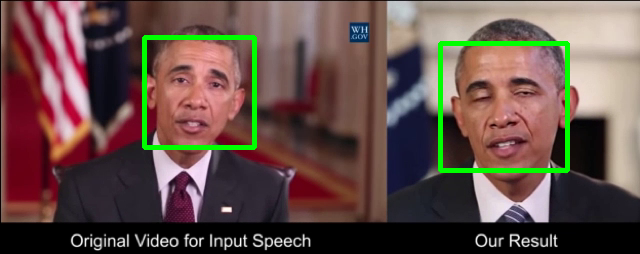

Done


In [10]:
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
  print("File Load Error")
  exit()

while True:
  ret, frame = cap.read()
  if frame is None:
    print("Done")
    break
  detectAndDisplay(frame)